# Task 3 - EDA

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import pandas_profiling

In [2]:
from scripts import project_functions as pf # This is called a relative import
n = "/Users/a123/Desktop/School/UBC_2021Summer/Cosc301/Project/spare.csv"

## Describe dataset
- Who: Which company/agency/organization provided this data?
- What: What is in your data?
- When: When was your data collected (for example, for which years)?
- Why: What is the purpose of your dataset? Is it for transparency/accountability, public interest, fun, learning, etc...
- How: How was your data collected? Was it a human collecting the data? Historical records digitized? Server logs?

The data is collected from between 30th April 2008 to 31st November 2010, which was used as part of a telephonic marketing campaign for a banking institution in Portugal. The data is collected into a server log by humans during the telephone conversation by the marketing campaign. It is filled with entities of contacting clients, though users need to be aware that, for often, there could be more than one contact of the same client as the marketing campaign needs to access if the customer would be subscribed to the bank term deposit or not.

There are 18 attributes in this dataset, each records a client information from the bank such as: age, job, marital status, education level, balance, housing loan, term deposit subscription status, etc. The purpose for this dataset is to identify and predict if a potential customer would opt for term deposit or not, and hints the financial and personal information in the dataset.

For this project, we will extract the data and provide a "scores" for each identity. This "scores" is based on our calculation of financial information "balance", "housing", and "loan". Based on this calculation we can understand the corelation between financial status and subscribing a term deposit. Perhaps it is worth to study about the personal background for these group of people as well to see the relationship with our financial scores.

## Load and explore dataset

In [3]:
df = pf.load_and_process(n)
df

,age,occupation,marriage status,education level,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,have termed deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Wrangling

In [5]:
df1 = df.drop(['default','default','contact','day','month','duration','campaign','pdays','previous','poutcome'],axis='columns')
df1

,age,occupation,marriage status,education level,balance,housing,loan,have termed deposit
0,58,management,married,tertiary,2143,yes,no,no
1,44,technician,single,secondary,29,yes,no,no
2,33,entrepreneur,married,secondary,2,yes,yes,no
3,47,blue-collar,married,unknown,1506,yes,no,no
4,33,unknown,single,unknown,1,no,no,no
...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,no,yes
45207,71,retired,divorced,primary,1729,no,no,yes
45208,72,retired,married,secondary,5715,no,no,yes
45209,57,blue-collar,married,secondary,668,no,no,no


In [6]:
df1['balance'] = df1['balance'].fillna(0)
df2 = df1
df2

,age,occupation,marriage status,education level,balance,housing,loan,have termed deposit
0,58,management,married,tertiary,2143,yes,no,no
1,44,technician,single,secondary,29,yes,no,no
2,33,entrepreneur,married,secondary,2,yes,yes,no
3,47,blue-collar,married,unknown,1506,yes,no,no
4,33,unknown,single,unknown,1,no,no,no
...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,no,yes
45207,71,retired,divorced,primary,1729,no,no,yes
45208,72,retired,married,secondary,5715,no,no,yes
45209,57,blue-collar,married,secondary,668,no,no,no


In [7]:
df2[['occupation','marriage status','education level','housing','loan']] = df2[['occupation','marriage status','education level','housing','loan']].fillna("unknown")
df3 = df2
df3

,age,occupation,marriage status,education level,balance,housing,loan,have termed deposit
0,58,management,married,tertiary,2143,yes,no,no
1,44,technician,single,secondary,29,yes,no,no
2,33,entrepreneur,married,secondary,2,yes,yes,no
3,47,blue-collar,married,unknown,1506,yes,no,no
4,33,unknown,single,unknown,1,no,no,no
...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,no,yes
45207,71,retired,divorced,primary,1729,no,no,yes
45208,72,retired,married,secondary,5715,no,no,yes
45209,57,blue-collar,married,secondary,668,no,no,no


In [8]:
df3['have termed deposit'] = df3['have termed deposit'].dropna(axis='rows')
df4 = df3
df4

,age,occupation,marriage status,education level,balance,housing,loan,have termed deposit
0,58,management,married,tertiary,2143,yes,no,no
1,44,technician,single,secondary,29,yes,no,no
2,33,entrepreneur,married,secondary,2,yes,yes,no
3,47,blue-collar,married,unknown,1506,yes,no,no
4,33,unknown,single,unknown,1,no,no,no
...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,no,yes
45207,71,retired,divorced,primary,1729,no,no,yes
45208,72,retired,married,secondary,5715,no,no,yes
45209,57,blue-collar,married,secondary,668,no,no,no


## [Changes for v.2] 

To access the feedback : <br> <ins>"There could be many other factors that could affect having a term deposit or not. Try to explore that and see if there is any relation between those factors."</ins>

We look into the other factors that could affect having a term deposit or not. So we will create new columns called "credit_scores", in which it articulate based on the following statistics : 
1. Average house price in Portugal : EURO 1090. [Source link](https://www.properstar.co.uk/buying-property/portugal/house-prices#:~:text=Property%20in%20Portugal%20is%20some,2%2C300%20in%20France%2C%20for%20instance.)
2. Average personal loan is USD 6825, converted to EURO 5820. [Source link](https://www.fool.com/the-ascent/research/personal-loan-statistics/#:~:text=Key%20findings,from%20around%2033%25%20in%202013.)

With this in mind, we will create a new column called "credit_scores" by :
1. Adding 1090 to credit_scores if the person has housing.
2. Minus 5825 to credit_scores if the person has a loan.
3. Add balance to credit_scores.

In [9]:
df4['credit_scores'] = df4['balance']
df4['credit_scores'] = np.where(df['housing']=='yes',df4['credit_scores']+1090,df4['credit_scores'])
df4['credit_scores'] = np.where(df['loan']=='yes',df4['credit_scores']-5825,df4['credit_scores'])
df5 = df4
df5

,age,occupation,marriage status,education level,balance,housing,loan,have termed deposit,credit_scores
0,58,management,married,tertiary,2143,yes,no,no,3233
1,44,technician,single,secondary,29,yes,no,no,1119
2,33,entrepreneur,married,secondary,2,yes,yes,no,-4733
3,47,blue-collar,married,unknown,1506,yes,no,no,2596
4,33,unknown,single,unknown,1,no,no,no,1
...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,no,yes,825
45207,71,retired,divorced,primary,1729,no,no,yes,1729
45208,72,retired,married,secondary,5715,no,no,yes,5715
45209,57,blue-collar,married,secondary,668,no,no,no,668


In [10]:
df5['credit_conditions'] = np.where(df5['credit_scores']<1034,'below mean','above mean')
df5['credit_conditions'] = np.where(df5['credit_scores']<0,'below zero',df5['credit_conditions'])
df5['credit_conditions'] = np.where(df5['credit_scores']>1000000,'millionaire',df5['credit_conditions'])
df6 = df5
df6

,age,occupation,marriage status,education level,balance,housing,loan,have termed deposit,credit_scores,credit_conditions
0,58,management,married,tertiary,2143,yes,no,no,3233,above mean
1,44,technician,single,secondary,29,yes,no,no,1119,above mean
2,33,entrepreneur,married,secondary,2,yes,yes,no,-4733,below zero
3,47,blue-collar,married,unknown,1506,yes,no,no,2596,above mean
4,33,unknown,single,unknown,1,no,no,no,1,below mean
...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,no,yes,825,below mean
45207,71,retired,divorced,primary,1729,no,no,yes,1729,above mean
45208,72,retired,married,secondary,5715,no,no,yes,5715,above mean
45209,57,blue-collar,married,secondary,668,no,no,no,668,below mean


In [105]:
from pandas_profiling import ProfileReport
ProfileReport(df4)

## Initial observation to the data

From the pandas profiling status, we could have a few summary : 
- Most frequent type of person are management with tertiary education level.
- At this stage, we find out that we haven’t wrangle for the data columns “balance”, which creates problem for our graphs as it is driven by distinction.
- We now expecting people with termed deposit to be a niche group, as only 11.7% of people have subscribed to a termed deposit.
- Turns out housing is quite evenly, 55.6% of population with housing and 44.4% doesn’t. 
- There are 84.0% of population without loans, and 16.0% of population with loans. 

## Summary

From this light-model of EDA we have understand better with our dataset. Now look back into our research question, we will continue to centered around financial status and term deposit, and see the relationship between them :
<br>
<font color='blue'> - RQ : How does the financial/personal background (for example, age) look like for people who subscribed to a term deposit? </font>
<br>
We will also look at other direction given the vast data entry for personal and financial information we have :
<br>
<font color='blue'> - RQ : Does education level effect adult life? (a.k.a relationship between education level, and occupation, balance, housing.) </font>

<AxesSubplot:xlabel='have termed deposit', ylabel='count'>

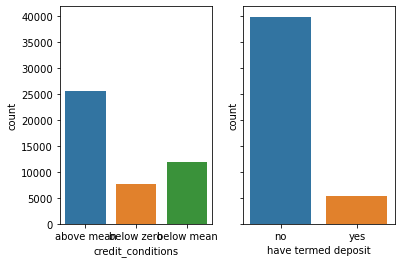

In [40]:
fig, (ax1,ax2) = plt.subplots(ncols=2, sharey=True)
sns.countplot(x="credit_conditions", data = df6, ax=ax1)
sns.countplot(x="have termed deposit", data = df6, ax=ax2)

We will be looking at the counts for "credit_conditions" and "have termed deposit", to get around heads the counting numbers for our topic of interest.

First we look at the credit_conditions for the entire population. We can see here there were around 7500 individuals with "below zero", around 125000 at "below mean" and over 25000 at "above mean". 
For the counting of termed deposit, over 40000 does not have one, and around 5000 does.

<AxesSubplot:xlabel='credit_scores', ylabel='age'>

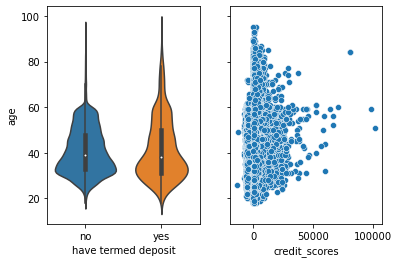

In [52]:
fig, (ax1,ax2) = plt.subplots(ncols=2, sharey=True)
sns.violinplot(x='have termed deposit',y='age',data=df6, ax=ax1)
sns.scatterplot(x="credit_scores", y='age', data = df6, ax=ax2)

<font color='blue'> - RQ : How does the <font color='red'>age</font> background look like for people who subscribed to a term deposit? </font>
<br>From the above two graphs, we can know the financing habits between age groups. 

For the violinplot, we can see that in terms of age, people at higher age tend to subscribe a termed deposit. In fact, at the age group of 60+, there are almost none whom without a termed deposit. In the other hand, people in younger age group are quite comparable as they figure spread evenly in this portion. 
For the scatterplot, we can see the credit_scores in terms of age. Surprisingly it shows for those who received "below zero" credits does not effect much by age, as seen from the graph as the population of "below zero" scattered across from around age 18-60.It is worth to note that, the age tend to wind down to around 18 to 55 as credit_scores getting worse, and wind up to around 25-60 as credit_scores getting better.

To summarise this research question, it can be thought that at younger age, whether or not to subscribe a termed deposit or having a good credit_scores are mostly down to personal taste. However, people at older age (from 60+) tend to have a better credit_scores, this can be thought as high age groups, they are more responsible for their finance. This is the age group that would preferred a stable finance, and therefore, subscribe a termed deposit in hold to gain incomes through a more stable/less troublesome way.

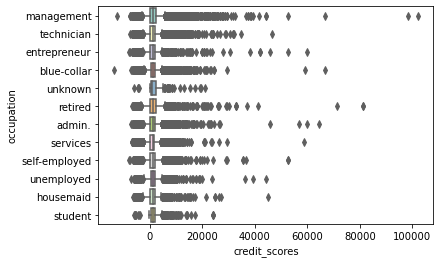

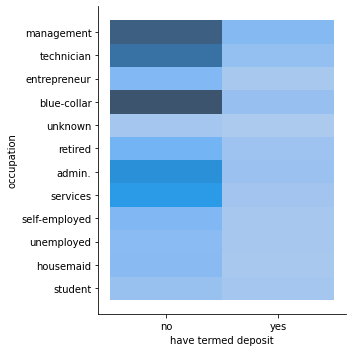

In [13]:
sns.boxplot(x="credit_scores", y='occupation', data = df6, palette="Set3")
sns.displot(x="have termed deposit", y='occupation', data = df6, palette="Set3")

<font color='blue'> - RQ : How does the <font color='red'>occupation</font> background look like for people who subscribed to a term deposit? </font>
<br>
From this boxplot, it shows regardless of the occupation, they all distributed quite evenly. With a few exception from people of management and retiredthat are able to fetch up to 80,000+ credit_scores. From the displot, we can see there are more people of management, technician, blue-collar, retired and admin who have subscribed a termed deposit. There are also these extra findings : 

- Students, housemaids and entrepreneurs are not the target audience for a termed deposit.
- Entrepreneurs and blue-collar has different interest in termed deposit, despite their similar credit_scores.

To summarise this, it can be thought that people who are from management, technician, blue-collar, retired and admin has the best financial ability (showned by high credit_scores) and are the group of people who most willing to plan ahead for their extra financial incomes. 
Students and housemaids does not have a good financial status (shown by low credit_scores), and hence their low interest in termed deposit. 
Also, the work focus bewteen entrepreneurs and blue-collars are different as entrepreneurship involves un-stable financial status with often time need an instant injection of cashflow, which explains why entrepreneurs tend to be less interested with a termed deposit, despite their healthy credit_scores.

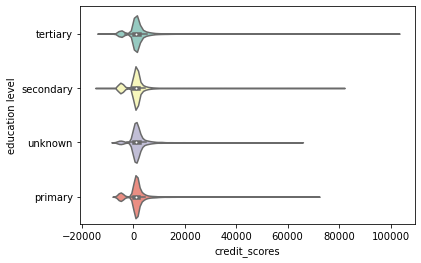

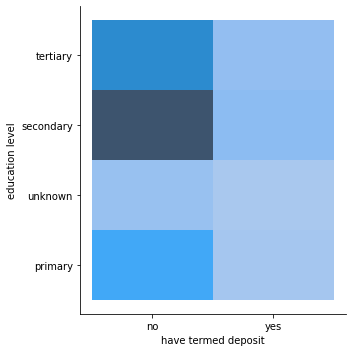

In [23]:
sns.violinplot(x="credit_scores", y='education level', data = df6, palette="Set3")
sns.displot(x="have termed deposit", y='education level', data = df6, palette="Set3")

<font color='blue'> - RQ : How does the <font color='red'>education level</font> background look like for people who subscribed to a term deposit? </font>
<br>
From the violinplot, it shows regardless of the education level, they all distributed quite evenly. People who has been in tertiary education can fetch up to a maximum 100,000 credit_scores. For people who has been secondary education at most, able to fetch up to 80,000 credit_scores. They are also the group of people who are more likely to subscribe a termed deposit, while people who has been in tertiary education are less likely to subscribe a termed deposit.

It is difficult to address and summarise this research question based on education level, because there are no direct correlation bewteen each education level and their credit_scores. Overall, a person's education level is not a great factor that effect one's decisions on whether to subscribes a termed deposit.

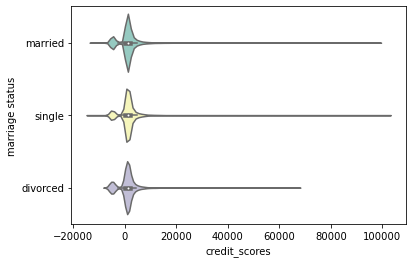

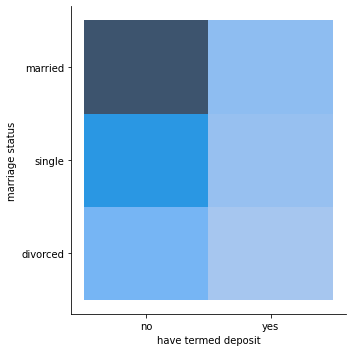

In [26]:
sns.violinplot(x="credit_scores", y='marriage status', data = df6, palette="Set3")
sns.displot(x="have termed deposit", y='marriage status', data = df6, palette="Set3")

<font color='blue'> - RQ : How does the <font color='red'>marriage status</font> background look like for people who subscribed to a term deposit? </font>
<br>
From this violinplot, it shows the credit_scores are evenly distributed between singles and married, with singles being slightly ahead. The divorced group has a lower credit_scores. Also, married groups are more likely to subscribes a termed deposit, while divorced group are the least likely to do so.

If we directly read into the results , we can summarise and say married people has better credit_scores and hence their willingness to subscribes a termed deposit, but it is needed to considered that, single and divorced people also has a good credit_scores. Therefore, it can be thought that people who are married are more likely to invest in a more stable way. While people that are single and divorced has less consideration about a stable finance, and less likely to subscribe a termed deposit.